# Exercise Session 2 - NumPy Basics

In this exercise we will work with a popular Python library for scientific computing with N-dimensional arrays - NumPy. You will see again some of the concepts introduced last week, such as indexing and slicing the lists, but NumPy adds multiple new concepts, namely broadcasting, vectorization, indexing using masking and wide range of functions to work with the arrays, which you will learn to use today. This exercise is quite long and you might not be able to finish it during the exercise sessions. However, the introduced concepts will be used during the following weeks so we would like to encourage you to take an extra time and try to finish the whole exercise before next week, since getting familiar with NumPy will pay-off when working on following exercise (and possibly in other courses relying on NumPy as well). Let's get started!

In the exercises you will be often referred to NumPy functions which you should use. Please inspect the [NumPy reference](https://docs.scipy.org/doc/numpy/reference/) and find out how to use the functions.

## 1 About NumPy

### NumPy

NumPy is a core library for scientific computing in Python. It offers high-performance multidimensional array computation capabilities. Furthermore, it provides wide ecosystem of libraries that take NumPy arrays as input.

### NumPy Arrays

NumPy arrays are high-performance homogeneous (= all elements of the same type) multidimensional arrays (think of an N-D grid). They are indexed by a tuple of nonnegative integers. Indexing syntax is similar to lists, tuples, and dictionaries, but NumPy adds some more fancy indexing tools.

Let us start with importing NumPy. By convention, it is imported as ``np``.

In [1]:
import numpy as np
import math 

# Let us also import plotting library
import matplotlib.pyplot as plt   
%matplotlib inline

## 2 Working with Arrays

### 2.1 Creating Arrays

Two most common ways of creating NumPy arrays are
1. Converting array-like Python objects (e.g. lists, tuples) using the function ``np.array``.
2. Calling one of the built-in functions provided by NumPy.

The following cells introduce the syntax to create the arrays and some common built-in NumPy functions.


In [2]:
### Converting Python array-like objects.

# 1D array from list, shape (4, ).
x_1d = np.array([1, 3, 5, 7])

# 2D array from combination of lists and tuples, shape (3, 3).
x_2d = np.array([(1, 1, 1), [2, 2, 2], (3, 3, 3)])

# Print the results.
print(f'x_1d:\n{x_1d}\n')
print(f'x_2d:\n{x_2d}\n')

x_1d:
[1 3 5 7]

x_2d:
[[1 1 1]
 [2 2 2]
 [3 3 3]]



In [3]:
### Using built-in functions provided by NumPy.

# 2D array of zeros, 2 rows, 3 columns.
x_zeros = np.zeros((2, 3))

# 3D array of ones, shape (2, 3, 4) - 2 matrices of 3 rows and 4 columns.
x_ones = np.ones((2, 3, 4))

# Identity matrix with 4 rows and 4 columns.
x_identity = np.eye(4)

# Sequence of numbers from 5 to 10 with step 2.
x_seq = np.arange(5, 11, 2)

# Sequence of ones of the same shape as `x_zeros`.
x_ones_as_zeros = np.ones_like(x_zeros)


# Print the results.
print(f'x_zeros:\n{x_zeros}\n')
print(f'x_ones:\n{x_ones}\n')
print(f'x_identity:\n{x_identity}\n')
print(f'x_seq:\n{x_seq}\n')
print(f'x_ones_as_zeros:\n{x_ones_as_zeros}\n')

x_zeros:
[[0. 0. 0.]
 [0. 0. 0.]]

x_ones:
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

x_identity:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

x_seq:
[5 7 9]

x_ones_as_zeros:
[[1. 1. 1.]
 [1. 1. 1.]]



### 2.2 Data Types

NumPy arrays can be given an explicit data type. Specifying a data type gets useful for instance when using arrays for indexing (integers) or masking (boolean). Full list of supported data types can be found [here](https://docs.scipy.org/doc/numpy/user/basics.types.html).

Data type can be specified when creating an array using an argument ``dtype``, arrays can be also cast to a given datatype using function ``astype``.

In [4]:
# Create an array of 32bit integers.
x_int = np.array([1, 2, 3, 4, 5], dtype=np.int32)

# Cast integer array to 32 bit float array.
x_float = x_int.astype(np.float32)

# Print results.
print(f'Array x_int has data type {x_int.dtype}')
print(f'Array x_float has data type {x_float.dtype}')

Array x_int has data type int32
Array x_float has data type float32


### 2.3 Inspecting the Arrays

When working with arrays, it is easy to loose track about current number shape or data type. The properties ``ndim``, ``shape``, ``size``, ``dtype`` facilitate working with arrays and debugging your code. Furthermore, you can also simply print out an array using Python's ``print`` function. 

In [5]:
# Crate a 3D array.
x_3d = np.array([[[1, 2, 3, 4], [4, 7, 1, 9], [0, 4, 6, 8]], 
                 [[5, 2, 8, 0], [2, 4, 3, 1], [1, 0, 4, 9]]])

# Check the number of dimensions, number of elements, shape, and data type.
print(f'Number of dimensions: {x_3d.ndim}')
print(f'Number of elements: {x_3d.size}')
print(f'Shape: {x_3d.shape}')
print(f'Data type: {x_3d.dtype}')

# Simply print the array.
print(x_3d)

Number of dimensions: 3
Number of elements: 24
Shape: (2, 3, 4)
Data type: int64
[[[1 2 3 4]
  [4 7 1 9]
  [0 4 6 8]]

 [[5 2 8 0]
  [2 4 3 1]
  [1 0 4 9]]]


### 2.4 Reshaping the Arrays
Arrays can be reshaped using a function ``reshape``. Note that the requested shape has to have the same number of elements as the original array.

The shape of an array is given as a tuple of integers representing the number of elements in each dimension. Here a couple of examples of the shapes:
- () - A 0D array, effectively a scalar.
- (4, ) - A 1D array (vector) of 4 elements.
- (3, 4) - A 2D array (matrix) of 3 rows and 4 columns.
- (2, 3, 4) - A 3D array (block), think of 2 2D matrices each having 3 rows and 4 columns.

When reshaping an array, you can use a value ``-1`` for at most one axis, meaning that the number of elements for that axis will be computed automatically.

In [6]:
# Create a 2D array filled with a sequence of numbers.
x_seq_2d = np.arange(12).reshape(4, 3)

# Create a 3D array filled with ones, last axis computed automatically.
x_ones_3d = np.ones(8).reshape((2, 2, -1))

# Print the results.
print(f'x_seq_2d:\n{x_seq_2d}\n')
print(f'x_ones_3d:\n{x_ones_3d}\n')

x_seq_2d:
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

x_ones_3d:
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]



### 2.5 Exercises

In [7]:
## Create a 1D array of 10 elements of type float32 filled with a value 3.14.
## Hint: Use np.ones or np.full.

array_pi = np.ones((10, )).astype(np.float32) * math.pi
print(f'array_pi:\n{array_pi}\n')

## Find number of elements in the following array without using `size` property.
## Hint: Use np.prod.
x = np.zeros((4, 5, 6, 7, 8))

num_elements = np.sum(np.ones_like(x))
print(f'Number of elements in x: {num_elements}')

## Reshape the 3D array "x_unknown" to a 1D array. Note that you do not know the shape of the array.
## Hint: You can access the shape property, use the `-1` trick, or function np.flatten().
x_unknown = np.zeros(np.random.randint(1, 5, 6))

x_flat = x_unknown.reshape((-1, ))
print(f'Shape of x_flat: {x_flat.shape}')

# Check the answers:
assert(array_pi.shape == (10, ) and array_pi.dtype == np.float32 and np.allclose(array_pi, 3.14, rtol=0.01))
assert(num_elements == x.size)
assert(x_flat.ndim == 1)

array_pi:
[3.1415927 3.1415927 3.1415927 3.1415927 3.1415927 3.1415927 3.1415927
 3.1415927 3.1415927 3.1415927]

Number of elements in x: 6720.0
Shape of x_flat: (192,)


## 3 Accessing Array Elements
In order to access the values of an array, **indexing** and **slicing** is used the same way you used it to slice Python array-like objects. Since NumPy arrays are N-dimensional, you can use a seprate indexing/slicing expression for each axis separately.

NumPy further extends the standard indexing/slicing by the following:
- indexing using an array of indices
- indexing using boolean array (i.e. masking).
- structural indexing

The indexing can be used not only for retrieving the values but also modifying the values in the original array (using the indexed array as an L-value):

- ``selection = x[3:5, 1::3]  # Retrieving a value.``
- ``x[3:5, 1::3] = 3.14       # Replacing the selected values by 3.14``

### 3.1 Standard Indexing and Slicing
Works the same way as for Python lists, but can be specified separately for every dimension separately. Use the familiar syntax ``[start : end]`` or ``[start : stop : step]``. When using the range using ``start`` and ``end``, remember that ``start`` is inclusive and ``end`` is exclusive. E.g. writing ``x[2:4]`` will select result in an array of ``[x[2], x[3]]``.

All `start`, `stop` and `step` values can be left out. Missing `start` defaults to `0`, missing `end` defaults to the the index of the last element plus one (remember that ``end`` is exclusive), missing `step` defaults to `1`.

Note that the step can be negative in which case you traverse an array backwards.

The image below depicts a 2D array of the shape (5, 6) and a couple of different indexing strategies. Let us try them out.

<img src="img/slicing.png" alt="slicing" width="500">

In [8]:
# Create a 2D array, which will be used in the following cells, an print it out.
x = np.arange(1, 31).reshape((5, 6))
print(f'Array x:\n{x}\n')

# Access 3 elements in the 1st row.
orange = x[0, 2:5]
print(f'orange:\n{orange}\n')

# Access the third column.
red = x[:, 2]
print(f'red:\n{red}\n')

# Access a 2x2 submatrix form the bottom right corner.
green = x[-2:, -2:]
print(f'green:\n{green}\n')

# Access elements from even indices starting from the 3rd row.
magenta = x[2::2, ::2]
print(f'magenta:\n{magenta}\n')

# Replace last two rows with zeros.
x[-2:, :] = 0
print(x)

Array x:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]

orange:
[3 4 5]

red:
[ 3  9 15 21 27]

green:
[[23 24]
 [29 30]]

magenta:
[[13 15 17]
 [25 27 29]]

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


### 3.2 Indexing by an Array of Indices.
On top of standard indexing, NumPy also allows for providing a list of integer indices for every axis.

<img src="img/indexing_by_array.png" alt="slicing" width="500">

In [9]:
# Create a 2D array, which will be used in the following cells, an print it out.
x = np.arange(1, 31).reshape((5, 6))
print(f'Array x:\n{x}\n')

# Access the 2nd, the 4th and the 5th columns.
red = x[:, [1, 3, 4]]
print(f'red:\n{red}\n')

# Access the elements from the 2nd and the 3rd rows in a zig-zag fashion.
magenta = x[[1, 2, 1, 2], range(4)]
print(f'magenta:\n{magenta}\n')

# Replace the violet elemenets with a value -1.
x[[1, 2, 1, 2], range(4)] = -1
print(x)

Array x:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]

red:
[[ 2  4  5]
 [ 8 10 11]
 [14 16 17]
 [20 22 23]
 [26 28 29]]

magenta:
[ 7 14  9 16]

[[ 1  2  3  4  5  6]
 [-1  8 -1 10 11 12]
 [13 -1 15 -1 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]


### 3.3 Masking
We have seen indexing using arrays of integers, where the integer numbers pointed to given elements. Another approach is indexing using boolean arrays representing a binary mask. Such a mask must have the same shape as indexed array, or it must match along the first dimensions (where the last dimensions are taken as is). A mask array can only contain boolean values ``True`` and ``False``, otherwise it would be interpreted as indexing by an integer array.

Masking can be combined with traditional indexing/slicing and indexing using integer arrays. However, the mask must have the same shape as that dimension(s) for which we are using the mask.

Masking is especially useful when you want to access those elements in an array which satisfy certain condition. E.g. You might want to access all the elements bigger then a given threshold. Comparison operators (`<`, `>`, `==`, `>=`, `<=`) and other NumPy functions can be used to compare an array to a given value and get a binary mask.

<img src="img/masking.png" alt="slicing" width="400">

In [10]:
# Create a 2D array, which will be used in the following cells, an print it out.
x = np.arange(1, 31).reshape((5, 6))
print(f'Array x:\n{x}\n')

Array x:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]



In [11]:
### Creating the mask manually.
# Create a mask corresponding to the red squares.
mask = np.zeros((5, 6), dtype=bool)
mask[0, 1:4] = True
mask[2, 2] = True
mask[3, :2] = True
mask[-1, -2:] = True
print(f'mask:\n{mask}\n')

# Select the values using a mask
red = x[mask]
print(f'red:\n{red}\n')

# Combining traditional indexing/slicing and masking - select the green
# columns. Not that the mask is a 1D array whose size is the
# same as the size of the corresponding dimension of the original 
# array `x`.
mask = np.array([True, False, False, False, False, True])
green = x[:, mask]
print(f'green:\n{green}\n')

mask:
[[False  True  True  True False False]
 [False False False False False False]
 [False False  True False False False]
 [ True  True False False False False]
 [False False False False  True  True]]

red:
[ 2  3  4 15 19 20 29 30]

green:
[[ 1  6]
 [ 7 12]
 [13 18]
 [19 24]
 [25 30]]



In [12]:
### Creating the mask using comparison operators.

# Extract the values larger than 26.
mask = x > 26
sel = x[mask]
print(f'mask:\n{mask}\n')
print(f'bigger than 26:\n{sel}\n')

# Extract the odd values.
mask = (x % 2) == 1
sel = x[mask]
print(f'mask:\n{mask}\n')
print(f'odd:\n{sel}\n')

mask:
[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False  True  True  True  True]]

bigger than 26:
[27 28 29 30]

mask:
[[ True False  True False  True False]
 [ True False  True False  True False]
 [ True False  True False  True False]
 [ True False  True False  True False]
 [ True False  True False  True False]]

odd:
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]



### 3.4 Structural Indexing
Finally, NumPy introduces an object ``np.newaxis`` and an *ellipsis* syntax to facilitate indexing/reshaping.

``np.newaxis`` can be used within square brackets to create a new empty axis. E.g. if we have a 1D array of $E$ elements and we want to make it a column vector explicitly, i.e. a matrix with $E$ rows and 1 column, ``np.newaxis`` object comes in handy. (Note that ``np.newaxis`` is in fact defined as ``None``, therefore you can use ``None`` instead.)

```python
>>> col_vec = np.array([1, 2, 3])
>>> col_vec.shape
    (3, )
>>> col_vec = col_vec[:, np.newaxis]  # or col_vec[:, None]
>>> col_vec.shape
    (3, 1)
```

``ellipsis`` operator ``...`` stands for "as many as needed" consecutive symbols ``:`` used when slicing a multidimensional array.

```python
>>> x = np.ones((3, 4, 5, 6))
>>> x.shape
    (3, 4, 5, 6)
>>> a = x[0, :, :, 3]
>>> b = x[0, ..., 3]
>>> np.allclose(a, b)
```

### 3.5 Exercises

Using only standard indexing/slicing, extract the subarrays as depicted in the Figure below.

<img src="img/slicing_ex.png" alt="slicing" width="300">

In [18]:
### Using _only_ standard indexing and slicing, select the red, blue and green 
# subarrays from the 3D array depicted above.

# Create a 2D array an print it out.
x = np.arange(1, 31).reshape((5, 6))
print(f'Array x:\n{x}\n')

# Select the subarrays

red = x[:, ::x.shape[1] - 1]
print(f'red:\n{red}\n')

green = x[2, 2:-1]
print(f'green:\n{green}\n')

blue = x[::2, 1:3]
print(f'blue:\n{blue}\n')

# Bonus: Come up with indexing which selects from x the following submatrix:
# [[29, 28], 
#  [11, 10]].

bonus = x[::-3, -2:-4:-1]
print(f'bonus:\n{bonus}\n')

# Check the results:
assert(np.allclose(red, np.array([[1, 6], [7, 12], [13, 18], [19, 24], [25, 30]])))
assert(np.allclose(green, np.array([15, 16, 17])))
assert(np.allclose(blue, np.array([[2, 3], [14, 15], [26, 27]])))
assert(np.allclose(bonus, np.array([[29, 28], [11, 10]])))

Array x:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]

red:
[[ 1  6]
 [ 7 12]
 [13 18]
 [19 24]
 [25 30]]

green:
[15 16 17]

blue:
[[ 2  3]
 [14 15]
 [26 27]]

bonus:
[[29 28]
 [11 10]]



We will move forward with the exercise session for now, but there are more exercises about indexing using list of indices and masking at the end of the exercise. We encourage you to do them all when you get to the end, as these concepts will keep reocurring in the upcoming exercises.

## 4 Iterating

An $N$ dimensional array can be expressed as a list of $N-1$ dimensional arrays. 

For instance, a (2D) matrix ``x = np.ones((2, 3))`` can be thought of as a list of (1D) vectors of length 3. As you have seen in Section 3.1, we can access, say, the 2nd row as ``x[1, :]`` which is, however, equivalent to ``x[1]`` (i.e. omitting the ``:`` symbol referring to "all the values in this dimension").

Similarly, a 3D array ``x = np.ones((4, 2, 3))`` can be thought of as a list of (2D) matrices of shape (2, 3). Again, we can access, say, the 1st matrix as ``x[0, :, :]``, which is equivalent to ``x[0]``.

You have seen how to iterate through an array (Python list) using ``for``-loop or ``while``-loop in the exercise 1. You can use the same strategy with NumPy arrays as well. I.e. treat an N dimensional array as a list of N-1 dimensional arrays.

Note that for many operations it is preferable _not_ to use an explicit ``for`` or ``while`` loop as the same computation can be usually achieved orders of magnitude faster using so called **vectorization** which will be introduced later. However, explicit iteration still comes in handy at times so it is useful to know how to use it.

In [19]:
# Let us create a 3D array, iterate through it's slices, i.e. matrices, and 
# find the trace of every matrix.
x = np.random.uniform(0, 10, (5, 10, 10))

for i, matrix in enumerate(x):
    print(f'Trace of matrix {i}: {np.trace(matrix)}')

Trace of matrix 0: 42.97659242394711
Trace of matrix 1: 56.5842522462222
Trace of matrix 2: 72.3778683332078
Trace of matrix 3: 49.040880007740455
Trace of matrix 4: 45.232179541113894


## 5 Concatenating, Stacking, Splitting

Arrays can be **concatenated** (i.e. glueing the arrays while keeping the number of dimensions) and **stacked** (gluing the arrays along a newly created dimension). **Splitting** is the counterpart operation to concatenating.

All of the **concatenated** arrays must have the same shape along all the dimensions except the one along which we concatenate. E.g. we can stack two matrices of shapes (4, 2) and (4, 5) along *axis 1* to get a new matrix of shape (4, 7).

All of the **stacked** arrays must have exactly the same shape, the size of the newly created dimensions correspond to the number of stacked arrays. E.g. we can stack 2 matrices of shapes (4, 3) and (4, 3) along the newly created dimension *axis 0* to get a 3D array of shape (2, 4, 3).

The axis for concatenation or stacing is specified using an argument ``axis``.

See the examples below.

In [20]:
### Concatenating.

# Concatenate a couple of matrices vertically.
m1 = np.array([[1, 2, 3], [4, 5, 6]])
m2 = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
m3 = np.array([[100, 200, 300]])
m_cat = np.concatenate([m1, m2, m3], axis=0)
print(m_cat)

m_cat_error = np.concatenate([m1, m2, m3], axis=1)  # This will fail, study the error message.

[[  1   2   3]
 [  4   5   6]
 [ 10  20  30]
 [ 40  50  60]
 [ 70  80  90]
 [100 200 300]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 3

In [21]:
### Stacking

# Stack a couple of matrices to create a 3D array.
m1 = np.array([[1, 2], [4, 5]])
m2 = np.array([[10, 20], [40, 50]])
m3 = np.array([[100, 200], [400, 500]])

# We can stack along any of axes 0, 1, 2. Stacking along different
# axis results in "rotating" our newly created 3D cube.
m_stack_0 = np.stack([m1, m2, m3], axis=0)
m_stack_1 = np.stack([m1, m2, m3], axis=1)
m_stack_2 = np.stack([m1, m2, m3], axis=2)

print(m_stack_0.shape)
print(m_stack_1.shape)
print(m_stack_2.shape)

(3, 2, 2)
(2, 3, 2)
(2, 2, 3)


### 5.1 Exercises

Study the reference for function ``np.split`` and use it to solve the following exercise.

In [29]:
## Create a 3D array of increasing sequence of even numbers (starting from 0) of shape (10, 5, 7).

x = np.arange(0, 10 * 5 * 7 * 2, 2).reshape((10, 5, 7))
print(f'x:\n{x}\n')

## Split the array into 5 arrays each of the shape (2, 5, 7)

splits_5 = np.split(x, 5, axis = 0)

## Split the array into 2 arrays of shapes (10, 2, 7) and (10, 3, 7)

splits_2 = np.split(x, [3], axis = 1)

# Check the answers.
assert((np.unique(x).size == 10 * 5 * 7) and np.all(x % 2 == 0) and np.min(x) == 0 and np.max(x) == 698)
assert(len(splits_5) == 5 and np.allclose(np.concatenate(splits_5, axis=0), x))
assert(len(splits_2) == 2 and np.allclose(np.concatenate(splits_2, axis=1), x))

x:
[[[  0   2   4   6   8  10  12]
  [ 14  16  18  20  22  24  26]
  [ 28  30  32  34  36  38  40]
  [ 42  44  46  48  50  52  54]
  [ 56  58  60  62  64  66  68]]

 [[ 70  72  74  76  78  80  82]
  [ 84  86  88  90  92  94  96]
  [ 98 100 102 104 106 108 110]
  [112 114 116 118 120 122 124]
  [126 128 130 132 134 136 138]]

 [[140 142 144 146 148 150 152]
  [154 156 158 160 162 164 166]
  [168 170 172 174 176 178 180]
  [182 184 186 188 190 192 194]
  [196 198 200 202 204 206 208]]

 [[210 212 214 216 218 220 222]
  [224 226 228 230 232 234 236]
  [238 240 242 244 246 248 250]
  [252 254 256 258 260 262 264]
  [266 268 270 272 274 276 278]]

 [[280 282 284 286 288 290 292]
  [294 296 298 300 302 304 306]
  [308 310 312 314 316 318 320]
  [322 324 326 328 330 332 334]
  [336 338 340 342 344 346 348]]

 [[350 352 354 356 358 360 362]
  [364 366 368 370 372 374 376]
  [378 380 382 384 386 388 390]
  [392 394 396 398 400 402 404]
  [406 408 410 412 414 416 418]]

 [[420 422 424 426 428 43

# 6 Basic Arithmetic Operators, Linear Algebra

Basic arithmetic operators `+`, `-`, `*`, `/`, `//`, `**`, `%` are applied element-wise as long as one of the operands is a scalar or both operands are arrays of the same shape. If the two arrays are not the same shape, **broadcasting** will be applied (see Section 7 Broadcasting).

Here are the most common linear algebra operators which you will mostly use for vectors (1D arrays) and matrices (2D arrays):
- `np.dot` - Scalar product, vector-matrix or matrix-matrix multiplication.
- `@` - The same as `np.dot`, syntactic sugar.
- `np.linalg.inv` - Matrix inversion.
- `np.linalg.norm` - Norm computation (L2 norm by default).
- `np.linalg.solve` - Numerically stable solution to a system of linear equations given as Ax = b.
- `x.T` - Transposition.

See the examples below.

In [30]:
### Arithmetic operations.

# When used for scalar and array operands, the scalar is applied to every element of an array regardless of its shape.
x = np.zeros((2, 2))
print(f'x:\n{x}\n')
x += 1
print(f'x + 1:\n{x}\n')

# When used for two array operands, the operator is applies to their corresponding values pair-wise.
x1 = np.arange(10).reshape((2, 5))
x2 = np.zeros((2, 5))
print(f'x1:\n{x1}\n')
print(f'x1:\n{x2}\n')
x2min1 = x2 - x1
print(f'x2 - x1:\n{x2min1}\n')

x:
[[0. 0.]
 [0. 0.]]

x + 1:
[[1. 1.]
 [1. 1.]]

x1:
[[0 1 2 3 4]
 [5 6 7 8 9]]

x1:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

x2 - x1:
[[ 0. -1. -2. -3. -4.]
 [-5. -6. -7. -8. -9.]]



In [31]:
### Linear algebra.

## Dot product of two orthogonal vectors.
v1 = np.array([0.0893, 0.9332, 0.3481])
v2 = np.array([-0.6949, -0.1920, 0.6930])
v_dot = np.dot(v1, v2)

# If they are orthogonal, their dot product should be close to 0.
print('v1 and v2 are orthogonal: {}'.format(
    ('FALSE', 'TRUE')[int(np.isclose(v_dot, 0., atol=1e-5))]))

## Matrix multiplication.
m1 = np.eye(3)
m2 = np.random.uniform(-10., 10., (3, 8))
m_mult = m1 @ m2

# m1 is an identity matrix, therefore the matrix multiplication with 
# any matrix M will produce the same matrix M.
print('m_mult is the same as m2: {}'.format(
    ('FALSE', 'TRUE')[np.allclose(m2, m_mult)]))

## Solve a linear system Ax = b.
# All the coefficients are random so it is extremely unlikely that we would
# generate a rank defficient matrix A and therefore the system of linear
# equations will have a solution.
A = np.random.uniform(-1., 1., (10, 10))
b = np.random.uniform(-1., 1., (10, ))
x = np.linalg.solve(A, b)

v1 and v2 are orthogonal: TRUE
m_mult is the same as m2: TRUE


### 6.1 Exercises

In [33]:
## Generate a matrix of shape (100, 100) filled with Euler's number. You cannot use np.full.

eul = np.full((100, 100), math.e) # or np.e * np.ones((100, 100))
print(f'eul:\n{eul}\n')

## Generate a 1D array of length 10 of powers of 2, i.e. [2^0, 2^1, ..., 2^9]

pows = np.power(np.full((10, ), 2), np.arange(10)) # or 2 ** np.arange(10)
print(f'pows:\n{pows}\n')

## Check the answers:
assert(np.allclose(eul, np.stack([[2.71828182] * 100] * 100, axis=0)))
assert(np.allclose(pows, [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9]))

eul:
[[2.71828183 2.71828183 2.71828183 ... 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 ... 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 ... 2.71828183 2.71828183 2.71828183]
 ...
 [2.71828183 2.71828183 2.71828183 ... 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 ... 2.71828183 2.71828183 2.71828183]
 [2.71828183 2.71828183 2.71828183 ... 2.71828183 2.71828183 2.71828183]]

pows:
[  1   2   4   8  16  32  64 128 256 512]



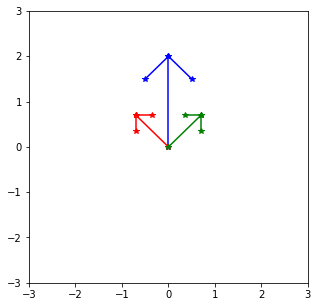

In [48]:
# Helper function to print an arrow.
def plot_arrow(pts, clr):
    plt.plot(*pts[:2].T, color=clr, marker='*')
    plt.plot(*pts[1:3].T, color=clr, marker='*')
    plt.plot(*pts[[1, 3], :].T, color=clr, marker='*')

## The array 'arrow' contains 4 2D points defining a blue arrow. The objective
## is to make the arrow 2 times shorter and thinner and rotate it by 45 degrees 
## counter-clockwise. 
## First you will rotate the arrow by multiplying the points with the rotation 
## matrix, where the rotation matrix stands on the left.
## Then, you will scale the arrow by multiplying the previous result with the scale matrix
## where the scale matrix stands on the left.

## Hint: You will need to do some transpose operations.

arrow = np.array([[ 0.,  0.,], 
                  [ 0.,  2.], 
                  [-0.5, 1.5], 
                  [ 0.5, 1.5]])
angle = np.pi / 4.

rot = np.array([[np.cos(angle), -np.sin(angle)], 
                [np.sin(angle),  np.cos(angle)]])

scale = np.array([[0.5, 0.], 
                  [0., 0.5]])

arrow_sr = np.dot(scale, np.dot(rot, arrow.T)).T 
arrow_test = np.dot(np.dot(arrow, rot), scale)

# Plot the arrows.
plt.figure(figsize=(5, 5))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plot_arrow(arrow, 'b')
plot_arrow(arrow_sr, 'r')
plot_arrow(arrow_test, 'g')

## Check the answers.
assert(np.allclose(arrow_sr, np.array([[ 0.        ,  0.        ],
                                       [-0.70710678,  0.70710678],
                                       [-0.70710678,  0.35355339],
                                       [-0.35355339,  0.70710678]])))

## 7 Broadcasting

Broadcasting allows for performing arithmetic and other operations on arrays of different shape, where the smaller is "broadcast" over the larger array. For instance, adding a column vector *v* to a matrix *M*, M + v, will effectively take every column of the matrix and add the vector *v* element-wise.

Broadcasting further allows for so called **vectorization**, i.e. performing a given operation in parallel where the actual looping occurs in highly-optimized C code rather than in Python, where looping is slow.

Example:

```python
>>> a = np.arange(6).reshape((2, 3))  # shape (2, 3)
array([[0, 1, 2],
       [3, 4, 5]])

>>> b = np.array([10, 20, 30])  # shape (3, )
array([10, 20, 30])

>>> a + b
array([[10, 21, 32],
       [13, 24, 35]])  # shape (2, 3)
```

### 7.1 Broadcasting Rules

The corresponding dimensions of the 2 arrays must satisfy one of the following:
- Have the same dimensions.
- One of the dimensions is 1.

Furthermore, non-existent dimensions are treated as 1.

Here are a couple of examples of the input and output shapes to a binary operation (such as `+`) being applied on 2 arrays *A* and *B*:

<img src='img/broadcasting.png' width=300>

**Note:** Do not confuse the concept of _vectorization_ with NumPy's function `np.vectorize`, which is provided for programming convenience, not for performance and thus does not guaranatee the actual vectorization of an operation.

If the concept is not clear, you can read more about broadcasting [here](https://numpy.org/devdocs/user/basics.broadcasting.html).

Go through the examples below and try to understand how the arrays are constructed and computed.

In [49]:
## Manual Python looping vs. vectorization - Multiplying a 
# matrix by a vector row-wise.
m = np.arange(15).reshape(5, 3)
v = np.array([0, 4, 2])
m_loop = np.copy(m)
m_vect = np.copy(m)

# Python loop.
for i in range(m.shape[0]):
    m_loop[i] *= v

# Vectorization.
m_vect *= v

# Check that both results are the same.
assert(np.allclose(m_loop, m_vect))

## Generate a matrix where each row holds a constant value 
## which increases throughout the rows.
seq_mat = np.ones((5, 3)) * np.arange(5).reshape((-1, 1))
print(f'seq_mat:\n{seq_mat}\n')

m = np.random.randint(0, 10, (4, 5))
print(f'm:\n{m}\n')

## Add a vector to a matrix row-wise (horizontally).
add_rw = np.array([10, 20, 30, 40, 50])
m_add_rw = m + add_rw
print(f'm_add_rw:\n{m_add_rw}\n')

## Add a vector to a matrix column-wise (vertically).
add_cw = np.array([10, 20, 30, 40]).reshape((-1, 1))
m_add_cw = m + add_cw
print(f'm_add_cw:\n{m_add_cw}\n')

seq_mat:
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]

m:
[[5 9 6 2 8]
 [6 2 8 0 0]
 [8 5 8 2 5]
 [0 1 9 7 3]]

m_add_rw:
[[15 29 36 42 58]
 [16 22 38 40 50]
 [18 25 38 42 55]
 [10 21 39 47 53]]

m_add_cw:
[[15 19 16 12 18]
 [26 22 28 20 20]
 [38 35 38 32 35]
 [40 41 49 47 43]]



### 7.2 Exercises

In [57]:
## Given a matrix 'data' defined below, Compute a matrix data_pow, 
## where a value in each column is taken to the power of its column
## index.

data = np.random.uniform(0, 5, (4, 5))
data_pow = data ** np.arange(data.shape[1])
print(f'data_pow:\n{data_pow}\n')

## Generate a matrix of shape (5, 4), where each row is an integer 
## sequence starting from 0 with an increment of a row index i. E.g.
## the first 3 rows would be:
##
## [0, 0, 0, 0]
## [0, 1, 2, 3]
## [0, 2, 4, 6]
##
## You can use 1D arrays only and the rules of broadcasting.
# Hint: Use np.arange

seqs = np.arange(5).reshape(5,-1) * np.arange(4)
print(f'seqs:\n{seqs}\n')

## Check the results:
data_pow_gt = np.copy(data)
for i in range(data.shape[1]):
    data_pow_gt[:, i] = data_pow_gt[:, i] ** i
assert(np.allclose(data_pow, data_pow_gt))
assert(np.allclose(seqs, np.array([[ 0,  0,  0,  0],
                                   [ 0,  1,  2,  3],
                                   [ 0,  2,  4,  6],
                                   [ 0,  3,  6,  9],
                                   [ 0,  4,  8, 12]])))

data_pow:
[[1.00000000e+00 1.28363529e+00 1.54506981e+01 3.02289766e+01
  1.76752339e+02]
 [1.00000000e+00 4.61524115e+00 5.25046157e-03 7.74826398e+00
  3.27492415e+02]
 [1.00000000e+00 4.20238708e+00 6.22089575e-02 2.43809109e-03
  3.72170847e-03]
 [1.00000000e+00 4.30536911e+00 2.29323893e+01 1.61223912e+01
  5.21670581e+01]]

seqs:
[[ 0  0  0  0]
 [ 0  1  2  3]
 [ 0  2  4  6]
 [ 0  3  6  9]
 [ 0  4  8 12]]



## 8 Common NumPy Functions

NumPy offers plethora of functions to perform computations with N dimensional arrays. One of the common concepts is that these functions would accept an argument `axis` using which you can specify along which axis the operation should be performed. 

For example, given a matrix `A =  np.array([[1, 2, 3], [4, 5, 6]])`, we might want to find a sum of values over rows and columns:

<img src='img/axis.png' width=400>

```python
>>> sum_per_row = np.mean(A, axis=1)
array([6, 15])

>>> sum_per_col = np.mean(A, axis=0)
array([5, 7, 9])
```

Among the most common functions you might need the following: `np.sum`, `np.prod`, `np.mean`, `np.std`, `np.min`, `np.max`, `np.argmin`, `np.argmax`, `np.sort`, `np.abs`, `np.sqrt`, `np.unravel`. Please study their corresponding reference pages and fill in the following exercises.

### 8.1 Exercises

In [58]:
## Given a matrix M, find the product of the values in each row.
M = np.arange(12).reshape((4, 3))

sm = np.prod(M, axis = 1)

# Check the results.
assert(np.allclose(sm, np.array([0, 60, 336, 990])))

Write a function `rescale` which takes as input an array $x \in \mathbb R ^ {N \times M}$ and scalars $a<b \in \mathbb R$ and returns an output array $y \in \mathbb [a,b] ^ {N \times M} : y = (b-a) \frac{(x - \min x)}{\max x - \min x} + a$.  

Hint: Use `np.min`, `np.max`

In [63]:
def rescale(x, a, b):
    """ Rescales the input from range [min(x), max(x)] to range [a, b].
    
    Args:
        x (np.array): Input array, shape (N, M).
        a (float): Lower bound of the output range.
        b (float): Upper bound of the output range.
        
    Returns:
        np.array: Rescaled array, shape (N, M).
    """
    return (b - a) * (x - np.min(x)) / (np.max(x) - np.min(x)) + a


# Test.
x = 2 * np.random.rand(3, 2) - 1
a, b = 1, 3
y = rescale(x, a, b)

assert(np.isclose(np.min(y), a) and np.isclose(np.max(y), b))

print(f'Input array:\n{x}\n')
print(f'Required range: {a, b}\n')
print(f'Output array:\n{y}\n')

Input array:
[[ 0.93535728  0.26143782]
 [-0.77291118  0.84249872]
 [-0.40349624 -0.94742138]]

Required range: (1, 3)

Output array:
[[3.         2.28412248]
 [1.18537516 2.90136009]
 [1.57778979 1.        ]]



Write function `find_closest`,  which given  scalar $u \in \mathbb R$ and input array $x \in \mathbb R ^ {N \times M}$, returns the closest element to the scalar in the array $x_{i^*,j^*} : (i^*,j^*)=\text{argmin}_{i,j} | x_{i,j} - u |$. $\text{argmin}$ is the operation that finds the index of the minimum element.

Hint: Use `np.abs`, `np.argmin`

In [75]:
def find_closest(x, u):
    """ Finds the closest element to `u` in `x`.
    
    Args:
        x (np.array): Input array, shape (N, M).
        u (float): A value to which the closest element in x is searched for.
        
    Returns:
        float: Closest element in `x` to `u`.
    """
    closest = np.argmin(np.abs(x - u))

    return x[closest]

# Test.
x = np.arange(11)
u = np.random.uniform(0, 10)
x_ij = find_closest(x, u)

assert(x_ij == x[int(round(u))] )

print(f'The closest element to {u:.3f} within {x} is {x_ij}')

The closest element to 0.229 within [ 0  1  2  3  4  5  6  7  8  9 10] is 0


Write a function `z_score_normalize` which takes as input array $x \in \mathbb R ^ {N \times M}$ and returns an output array $y \in \mathbb R ^ {N \times M}$ such that $\mathbb E [y]= 0$ and $\sigma [y] = 1$, where $\sigma[y]$ is a standard deviation of $y$.

Hint: Use `np.mean`, `np.std`

In [76]:
def z_score_normalize(x):
    """ Normalizes the input x so that its mean is 0 and std is 1.
    
    Args:
        x (np.array): Input array, shape (N, M).
        
    Returns:
        np.array: Normalized array, shape (N, M).
    """
    return (x - np.mean(x)) / np.std(x)
    

# Test.
x = 2 * np.random.rand(3, 2) - 1
y = z_score_normalize(x)

assert(np.isclose(np.mean(y), 0))
assert(np.isclose(np.std(y), 1.))

print(f'Mean/std for input array\n{x}\nis: {np.mean(x):.3f}/{np.std(x):.3f}\n')
print(f'Mean/std for normalized array\n{y} is:\n{np.mean(y):.3f}/{np.std(y):.3f}')

Mean/std for input array
[[-0.23265138 -0.29680146]
 [ 0.62341254  0.11938587]
 [ 0.50324898  0.53955895]]
is: 0.209/0.371

Mean/std for normalized array
[[-1.19092345 -1.36376521]
 [ 1.11559884 -0.24241745]
 [ 0.79183804  0.88966923]] is:
0.000/1.000


## 9 Shallow and Deep Copy

A simple assignment makes no copy of the underlying data, have a look at the following example:

```python
>>> a = np.array([1., 2., 3.])
>>> b = a
>>> b[1] = 1.602e-19
>>> print(a, b)
array([1, 1.602e-19, 3])
array([1, 1.602e-19, 3])
```

Assigning a slice of an array to a new array works with the very same data as well, i.e. no copy is made:

```python
>>> a = np.array([1., 2., 3.])
>>> b = a[:2]
>>> b[0] = 6.626e-34
>>> print(a, b)
array([6.626e-34, 2, 3])
array([6.626e-34, 2])
```

In order to truly copy the data, we need to make a deep copy using NumPy function `np.copy`:

```python
>>> a = np.array([1., 2., 3.])
>>> b = a.copy()
>>> b[2] = 9.807
>>> print(a, b)
array([1, 2, 3])
array([2, 2, 9.807])
```




## 10 Random

The module `np.random` implements pseudo-random number generators (RNG) for various distributions. We will frequently use it to randomly sample our data or to randomly initialize the parameters of our models.

In order to fix the RNG and thus to be able to reproduce the computation, we can set the so called *seed*. Setting the seed guarantees that the same sequence of numbers will be generated by the RNG in each run.

```python
>>> constant = 3  # Any number we want
>>> np.random.seed(constant)
```

Here are some of the functions we will be using most frequently:
- np.random.randint
- np.random.shuffle
- np.random.uniform
- np.random.randn
- np.random.permute

Please study their respective [reference pages](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html) and complete the exercises below.

### 10.1 Exercises

In [79]:
## Create a 1D array of randomly permuted sequence from 0 to 10.
x_perm = np.arange(11)
np.random.shuffle(x_perm)
print(f'Permuted array:\n{x_perm}\n')

## Check the answers.
assert(np.unique(x_perm).shape == (11, ) and np.min(x_perm) == 0 and np.max(x_perm) == 10)

Permuted array:
[10  6  8  9  3  4  5  0  2  7  1]



## 11 Extra Indexing Exercises

Using indexing by integer arrays, extract the subarrays as depcited in the Figure below.

<img src="img/indexing_by_array_ex.png" alt="slicing" width="300">

In [85]:
### Using a combination of standard indexing/slicing and an indexing by an array 
# of indices, select the following subarrays.

# Create a 2D array an print it out.
x = np.arange(1, 31).reshape((5, 6))
print(f'Array x:\n{x}\n')

# Select the subarrays.

red = x[range(5), range(5)]
print(f'red:\n{red}\n')

green = x[[0, 1, 3], -2:]
print(f'green:\n{green}\n')

blue = x[[3, 4, 4], [0, 0, 1]]
print(f'blue:\n{blue}\n')

# Bonus: Come up with indexing which results in matrix `x` being stacked 3 times 
# horizontally, i.e. the resulting shape is (15, 6).
# Hint: Use functions range and list, use operator * with a list.

bonus = x[list(range(5)) * 3]
print(f'bonus:\n{bonus}\n')

# Check the results:
assert(np.allclose(red, np.arange(1, 30, 7)))
assert(np.allclose(green, np.array([[5, 6], [11, 12], [23, 24]])))
assert(np.allclose(blue, np.array([19, 25, 26])))


Array x:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]

red:
[ 1  8 15 22 29]

green:
[[ 5  6]
 [11 12]
 [23 24]]

blue:
[19 25 26]

bonus:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]



Using masking, extract the subarray as depcited in the Figure below.

<img src="img/masking_ex.png" alt="slicing" width="300">

In [96]:
### Construct a mask and then extract the red values above the main diagonal.

## Extract the red values.
mask = np.zeros_like(x, dtype=bool)
for i in range(5):
    mask[i, i + 1:] = True
print(f'mask:\n{mask}\n')

red = x[mask]
print(f'red:\n{red}\n')

## Bonus: Extract all the values, which are not red.
## Hint: Use your already constructed `mask`, study NumPy's binary operations
## https://docs.scipy.org/doc/numpy/reference/routines.bitwise.html

the_rest = x[~mask]
print(f'the_rest:\n{the_rest}\n')

## Bonus2: Extract the values which can be divided by both 2 and 3.
## Hint: Construct two masks and combine them using NumPy's binary operators.

div23 = x[np.logical_and(x % 2 == 0, x % 3 == 0)]
print(f'div23:\n{div23}\n')

# Check the results:
assert(np.allclose(red, np.concatenate(
    [range(2, 7), range(9, 13), range(16, 19), range(23, 25), [30]])))
assert(np.allclose(np.sort(np.concatenate([red, the_rest])), np.arange(1, 31)))
assert(not np.any(np.fmod(div23, 2.)) and not np.any(np.fmod(div23, 3.)))

mask:
[[False  True  True  True  True  True]
 [False False  True  True  True  True]
 [False False False  True  True  True]
 [False False False False  True  True]
 [False False False False False  True]]

red:
[ 2  3  4  5  6  9 10 11 12 16 17 18 23 24 30]

the_rest:
[ 1  7  8 13 14 15 19 20 21 22 25 26 27 28 29]

div23:
[ 6 12 18 24 30]



## 12 Next Steps

Feel free to consult more thorough NumPy tutorials.

- NumPy basics: [https://docs.scipy.org/doc/numpy/user/basics.html](https://docs.scipy.org/doc/numpy/user/basics.html)
- Official NumPy tutorial: [https://docs.scipy.org/doc/numpy/user/quickstart.html](https://docs.scipy.org/doc/numpy/user/quickstart.html)